In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/subtitles_dataset_tokenized.csv')

In [3]:
df.shape

(46468, 9)

In [4]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration
0,0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,1147427,"Comedy,Family,Romance",0,NaN,untokenisiert,NaN
1,1,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294864,"Animation,Comedy",0,NaN,untokenisiert,NaN
2,2,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294865,"Animation,Comedy",0,NaN,untokenisiert,NaN
3,3,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,1328700,"Animation,Comedy",0,NaN,untokenisiert,NaN
4,4,6979068.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1328701,"Animation,Comedy",0,NaN,untokenisiert,NaN


In [5]:
df.dropna(subset=['genre', 'year', 'production_region', 'duration']).shape

(18277, 9)

In [6]:
df.shape[0] - df.dropna(subset=['text']).shape[0]

0

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration
79,79,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,6414,"Comedy,Romance,Short",1916,English,untokenisiert,30
80,80,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,6548,"Comedy,Short",1916,English,untokenisiert,24
82,82,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",6684,"Comedy,Short",1916,English,untokenisiert,24
85,85,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,7613,"Comedy,Short",1917,English,untokenisiert,24
86,86,6564950.xml,Die Heilquelle Die Gesundheit Frühling La moll...,7832,"Comedy,Short",1917,English,untokenisiert,24


# Publishing year

In [9]:
df.year.describe()

count    18277.000000
mean      1992.397987
std         20.505514
min       1916.000000
25%       1980.000000
50%       2000.000000
75%       2009.000000
max       2017.000000
Name: year, dtype: float64

In [10]:
year_bins = df.year.max() - df.year.min()
year_bins

101

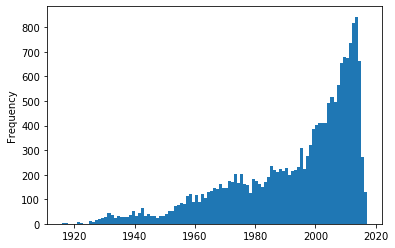

In [11]:
df.year.plot(kind='hist', bins=year_bins)

# Genre

## Unique combinations

In [12]:
df.genre.unique().shape

(592,)

In [13]:
from collections import Counter
genre_combination_frequs = Counter(df.genre)
genre_combination_frequs.most_common(20)

[('Drama', 1212),
 ('Comedy', 814),
 ('Drama,Romance', 615),
 ('Comedy,Drama,Romance', 571),
 ('Comedy,Drama', 549),
 ('Action,Crime,Drama', 456),
 ('Comedy,Romance', 416),
 ('Crime,Drama,Thriller', 367),
 ('Horror', 334),
 ('Crime,Drama', 292),
 ('Action,Crime,Thriller', 286),
 ('Action,Adventure,Sci-Fi', 273),
 ('Action,Comedy,Crime', 252),
 ('Drama,Thriller', 242),
 ('Crime,Drama,Mystery', 234),
 ('Action,Adventure,Drama', 230),
 ('Action,Adventure,Comedy', 208),
 ('Action,Adventure,Fantasy', 206),
 ('Horror,Thriller', 199),
 ('Comedy,Crime', 186)]

## Single genres

In [14]:
import re 
single_genres = set([re.sub(r'\s+', '', genre) for entry in df.genre.str.split(',') for genre in entry])
single_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [15]:
len(single_genres)

25

# Production Region

## Combinations

In [16]:
df.production_region.unique()

array(['English', 'Swedish', 'German', ..., 'Chinese, English',
       'Spanish, English, Icelandic, Portuguese',
       'Hebrew, English, Persian'], dtype=object)

In [17]:
df.production_region.unique().shape

(1238,)

In [18]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 8242),
 ('French', 1041),
 ('German', 939),
 ('Japanese', 625),
 ('English, Spanish', 529),
 ('Italian', 394),
 ('English, French', 387),
 ('Spanish', 204),
 ('English, Italian', 171),
 ('English, German', 163),
 ('English, Russian', 156),
 ('Korean', 153),
 ('English, Japanese', 127),
 ('French, English', 119),
 ('Cantonese', 118),
 ('Russian', 116),
 ('Mandarin', 113),
 ('Swedish', 104),
 ('Turkish', 78),
 ('English, Arabic', 69)]

## Single regions

In [19]:
single_region = set([re.sub(r'\s+', '', region) for entry in df.production_region.str.split(',') for region in entry])
single_region

{'Aboriginal',
 'Acholi',
 'Afrikaans',
 'Albanian',
 'Algonquin',
 'AmericanSignLanguage',
 'Amharic',
 'Ancient(to1453)',
 'Apachelanguages',
 'Arabic',
 'Aramaic',
 'Arapaho',
 'Armenian',
 'AssyrianNeo-Aramaic',
 'Athapascanlanguages',
 'Aymara',
 'Azerbaijani',
 'Bable',
 'Balinese',
 'Bambara',
 'Basque',
 'Belarusian',
 'Bengali',
 'Berberlanguages',
 'Bhojpuri',
 'Bosnian',
 'BrazilianSignLanguage',
 'Breton',
 'BritishSignLanguage',
 'Bulgarian',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Chechen',
 'Chinese',
 'Corsican',
 'Cree',
 'Creole',
 'Creolesandpidgins',
 'Croatian',
 'Crow',
 'Czech',
 'Danish',
 'Dari',
 'Dutch',
 'Egyptian(Ancient)',
 'English',
 'Esperanto',
 'Estonian',
 'Faroese',
 'Filipino',
 'Finnish',
 'Flemish',
 'French',
 'FrenchSignLanguage',
 'Fulah',
 'Gallegan',
 'Georgian',
 'German',
 'GermanSignLanguage',
 'Greek',
 'Greenlandic',
 'Guarani',
 'Gujarati',
 'Hakka',
 'Hawaiian',
 'Hebrew',
 'Hindi',
 'Hmong',
 'Hokkien',
 'Hungarian',
 'Icelandic',
 '

In [20]:
len(single_region)

172

# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df.text)

In [23]:
pca = PCA(n_components=2)
Xr = pca.fit_transform(X.todense())

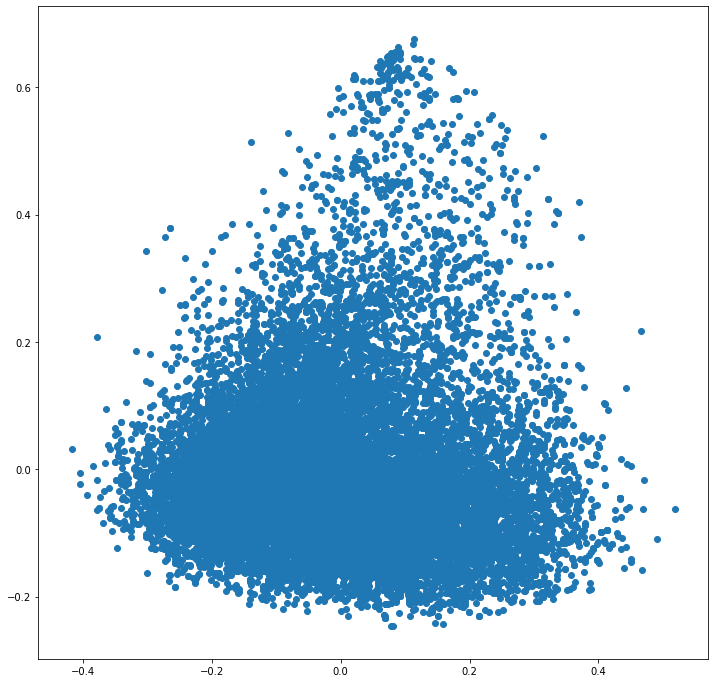

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(Xr[:,0], Xr[:,1])
plt.show()

In [25]:
import seaborn as sns

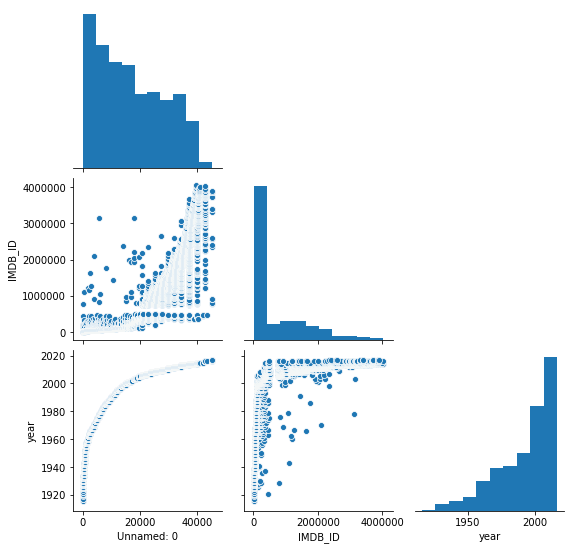

In [26]:
grid = sns.pairplot(df, corner=True)